<a href="https://colab.research.google.com/github/RicardoMorato/IntroToAI/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

In this notebook we are using a labeled dataset available in the public domain. It is based on IMDB movie reviews samples. You can find it [here](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [1]:
import pandas as pd


df = pd.read_csv("/content/Data/IMDB Dataset.csv", encoding="ISO-8859-1")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df.groupby("sentiment").describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  This show comes up with interesting locations ...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5

In [6]:
df = df.drop_duplicates()
df.groupby("sentiment").describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   24698  24698  Basically there's a family where a little boy ...   
positive   24884  24884  One of the other reviewers has mentioned that ...   

                
          freq  
sentiment       
negative     1  
positive     1

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Using stop words for this dataset end-up lowering the accuracy
vectorizer = CountVectorizer(ngram_range=(1,2), min_df=20)

x = vectorizer.fit_transform(df["review"])
y = df["sentiment"]

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

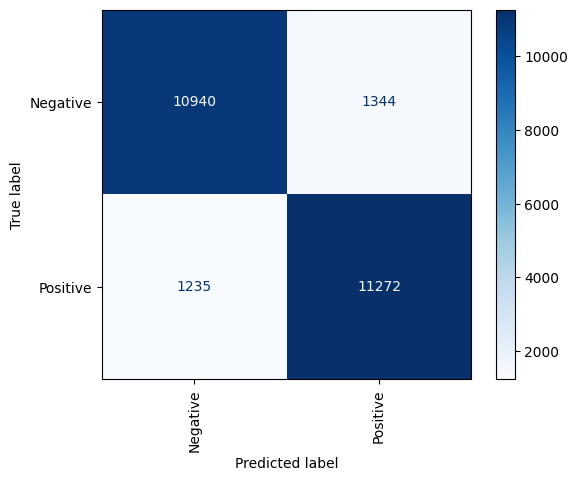

In [16]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(
    model,
    x_test,
    y_test,
    display_labels=["Negative", "Positive"],
    cmap="Blues",
    xticks_rotation="vertical",
)

In [17]:
text = "The long lines and poor customer service really turned me off"

model.predict_proba(vectorizer.transform([text]))[0][1]

0.11120192180585167

In [18]:
text = "The food was great and the service was excellent!"

model.predict_proba(vectorizer.transform([text]))[0][1]

0.9615609800157953